In [617]:
# Data wrangling
import numpy as np
import pandas as pd

# Dataviz
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer, InterclusterDistance, kelbow_visualizer, silhouette_visualizer
from yellowbrick.datasets import load_mushroom


## -- Machine learning -- ##
from sklearn import datasets
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans, DBSCAN, MeanShift
from sklearn.cluster import k_means, dbscan, mean_shift, estimate_bandwidth
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

from kmodes.kmodes import KModes            # clustering categorical data
from kmodes.kprototypes import KPrototypes  # clustering mixed data

# Didatic purposes
import string
from ipywidgets import interact

# Contextualização:

![](https://media-exp1.licdn.com/dms/image/C4E12AQGbAM-_eriLMw/article-cover_image-shrink_720_1280/0/1632916005843?e=1669248000&v=beta&t=Jrz7HA1m-Qbhm08T89CaeaESJnsodVxsetVxJHVsVKM)

[Fonte da imagem](https://www.linkedin.com/pulse/supervised-vs-unsupervised-learning-whats-difference-smriti-saini/)

**Aprendizado não-supervisionado (unsupervised learning)**

No aprendizado não supervisionado, do qual **clustering** faz parte, **não há variável resposta**, e entre seus objetivos estão o tratamento, exploração e diagnóstico dos dados (exemplo: encontrar padrões).

**Exemplos:**
- **Clustering:** identificar e agrupar observações similares.
- **Dimensionality reduction:** reduzir a quantidade de dimensões (variáveis).

**Quantos algoritmos não-supervisionados temos?**

- Clustering: [https://scikit-learn.org/stable/modules/clustering.html](https://scikit-learn.org/stable/modules/clustering.html)
- Dimentionality reduction: [https://scikit-learn.org/stable/modules/classes.html#module-sklearn.decomposition](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.decomposition)

**Classifique como tarefa supervisionada ou não-supervisionada:**

1. Segmentação de clientes para entendermos melhor diferentes perfis: ________
2. Classificação de clientes em churn e não-churn: ________
3. Agrupamento de produtos similares entre si: ________
4. Redução da dimensionalidade dos dados: ________
5. Previsão da probabilidade de um cliente contratar o serviço: ________

<details>
  <summary><b>Respostas</b></summary>
  <ol type="1">
  <li><b>unsupervised learning</b></li>
  <li>supervised learning</li>
  <li><b>unsupervised learning</b></li>
  <li><b>unsupervised learning</b></li>
  <li>supervised learning</li>
  </ol>
</details>

# Código:

### Data Understanding:

In [618]:
class DataUnderstanding():
    def verificando_as_dimensões_do_dataframe(self, dataframe):
        dataframe = dataframe.shape
        print(f'Linhas: {dataframe[0]} \nColunas: {dataframe[1]}')

    def descrição(self, dataframe):
        dataframe = dataframe.describe().round(decimals=2)
        display(dataframe)

    def verificando_tipos(self, dataframe):
        dataframe = (
            dataframe.dtypes
            .to_frame('Tipos')
        )
        display(dataframe)

    def verificando_valores_nulos(self, dataframe):
        valores_nulos = dataframe.isnull().sum()
        percent_missing = (valores_nulos / len(dataframe))
        dataframe = pd.DataFrame(
            {
                'Quantidade': valores_nulos,
                'Porcentagem': percent_missing
            }
        )
        dataframe = dataframe.style.format('{:.2%}', subset=['Porcentagem'])
        display(dataframe)

    def verificando_valores_duplicados(self, dataframe):
        valores_repetidos = dataframe.apply(lambda x: x.duplicated()).sum()
        percent_missing = (valores_repetidos / len(dataframe))
        dataframe = pd.DataFrame(
            {
                'Quantidade': valores_repetidos,
                'Porcentagem': percent_missing
            },
            index=dataframe.columns
        )

        dataframe = dataframe.style.format('{:.2%}', subset=['Porcentagem'])
        display(dataframe)

    def frequencia_da_repetição_dos_valores(self, dataframe, coluna):
        dataframe = dataframe[coluna].value_counts().reset_index()
        return dataframe

    def verificando_correlação(self, dataframe):
        dataframe = dataframe.corr()
        return dataframe


if __name__ == '__main__':
    data_understanding = DataUnderstanding()

### Data Preparetion:

In [619]:
class DataPreparetion(DataUnderstanding):
    def removendo_nulos(self, dataframe: pd.DataFrame) -> pd.DataFrame:
        return dataframe.dropna()

    def removendo_colunas(self, dataframe: pd.DataFrame, colunas=[]) -> pd.DataFrame:
        return dataframe.drop(colunas, axis=1)
    
    def removing_outliers_zscore(self, dataframe: pd.DataFrame, zscore: int=3):
        outlier_rows = dataframe.abs().gt(zscore).any(axis=1)
        amount_of_outliers = outlier_rows.sum()
        print(f'Amount of outliers: {amount_of_outliers}')
        return dataframe[~outlier_rows], outlier_rows

    def renomeando_colunas(self, dataframe: pd.DataFrame, novo_nome_e_velho_nome: dict):
        return dataframe.rename(columns=novo_nome_e_velho_nome)

    def substituindo_valores(self, dataframe: pd.DataFrame, colunas, valores) -> pd.DataFrame:
        return dataframe[colunas].replace(valores)

    def convertendo_colunas(self, dataframe: pd.DataFrame, colunas, tipo: str) -> pd.DataFrame:
        return dataframe[colunas].astype(tipo)

    def dummy(self, dataframe: pd.DataFrame, colunas=[]):
        dataframe = pd.get_dummies(dataframe[colunas])
        colunas = dataframe.columns
        return dataframe, colunas

    def label_endcode(self, dataframe: pd.DataFrame):
        training = LabelEncoder().fit(dataframe)
        dataframe = training.transform(dataframe)
        return dataframe

    def normalizando_os_dados(self, dataframe: pd.DataFrame):
        return dataframe.apply(scale)


if __name__ == '__main__':
    data_preparetion = DataPreparetion()

### Data Visualization:

In [620]:
class DataVisualization(DataPreparetion):
    def gráfico_de_barras(self, dataframe, x, y):
        sns.barplot(
            data=dataframe,
            x=x,
            y=y
        )
        plt.show()

    def gráfico_de_linha_desempenho_do_modelo(self, y_true, y_pred):
        index = [i for i in range(1, len(y_pred)+1, 1)]

        fig = plt.figure(figsize=(12, 8))
        plt.plot(index, y_true, color='blue')
        plt.plot(index, y_pred, color='red')
        plt.xlabel('index')
        plt.ylabel('valores')
        plt.show()

    def gráfico_de_regressão_lmplot(self, dataframe, x, y, titulo):
        sns.lmplot(
            data=dataframe, 
            x=x,
            y=y
        )
        ax = plt.gca()
        ax.set_title(titulo)
        plt.show()

    def gráfico_de_correlação_pairplot(self, dataframe):
        sns.pairplot(dataframe)
        plt.show()

    def gráfico_de_correlação_heatmap(self, dataframe):
        sns.set(style='white')
        corr = dataframe.corr()
        plt.figure(figsize=(16, 10))
        sns.heatmap(corr, annot=True, cmap='RdBu_r', fmt='.2f', annot_kws={'size': 12})
        plt.show()

    def gráfico_outliers_boxplot(self, dataframe, figsize):
        dataframe = dataframe.select_dtypes(include='number')
        dataframe = dataframe.apply(scale)
        sns.set(font_scale=1.4)
        fig = plt.figure(figsize=figsize)
        sns.boxplot(data=dataframe)
        plt.xticks(rotation=60, ha='right')
        plt.show()

    def gráfico_de_distribuição_histplot(self, dataframe, coluna):
        sns.histplot(data=dataframe[coluna])

        plt.show()

    def gráfico_scatterplot(self, dataframe: pd.DataFrame, x:str, y:str, hue:list, titulo: str=''):
        sns.scatterplot(data=dataframe, x=x, y=y, hue=hue)
        plt.title('Labeled clusters')
        plt.show()

    def gráfico_de_visualize_simulated_clusters_scatterplot(self, dataframe: pd.DataFrame, x:str, y:str, hue:list, centroids, titulo: str=''):
        ax = sns.scatterplot(data=dataframe, x=x, y=y, hue=hue)
        sns.scatterplot(x=centroids[:,0], y=centroids[:,1], marker='*', s=500, color='black', ax=ax)

        plt.title('Labeled clusters')
        plt.show()

    def gráfico_kelbow_visualizer(self, modelo, x, k: int):
        return kelbow_visualizer(modelo, x, k=k, timings=False)
    
    def gráfico_silhouette_visualizer(self, modelo, x):
        return silhouette_visualizer(modelo, x)
    
    def gráfico_density(self, dataframe: pd.DataFrame, x: str, y: str):
        """Density plot"""
        return sns.kdeplot(data=dataframe, x=x, y=y);

# Kmeans:

Apps de simulação:
- [Versão em português (streamlit)](https://cmcouto-silva-kmeans-app-pt-streamlit-app-tyl62y.streamlitapp.com/)
- [Versão em português (dash)](https://kmeans-animation-pt.herokuapp.com/)
- [Versão em inglês](https://cmcouto-silva-kmeans-app-en-streamlit-app-v886a2.streamlitapp.com/)

**Requerimentos:**
- Dados numéricos contínuos
- Dados na mesma escala
- Pré-determinação do número de grupos (k)

**Vantagens:**
- Simples
- Eficiente
- Escalável para uma grande quantidade de dados

**Desvantagens:**
- Sensível a outliers
- Pré-determinação do número de grupos (k)
- Não adequado para dados categóricos (mesmo com one-hot encoding)
- Agrupa apenas pontos próximos entre si

Por quê não utilizar dummies no algoritmo? Vide:
- [https://www.ibm.com/support/pages/clustering-binary-data-k-means-should-be-avoided](https://www.ibm.com/support/pages/clustering-binary-data-k-means-should-be-avoided)
- Livro: Practical Statistics for Data Scientists (Peter Bruce et al., 2020)
- Statistical foruns

## DataFrame:

In [621]:
# Simulate clusters
x, y = datasets.make_blobs(
    n_samples=int(5E3), 
    n_features=2, 
    centers=4, 
    cluster_std=.8
)

df = pd.DataFrame(
    data=x, 
    columns=list(string.ascii_uppercase[:x.shape[1]])
)

In [622]:
display(df.head())

,A,B
0,-9.592322,8.228040
1,-10.025708,9.095338
2,-0.617625,6.745875
3,-7.936335,-8.777559
4,-7.766953,-6.450669


## Código:

In [623]:
class ClusteringKMeans(DataVisualization):
    def clustering_k_means(self, x, n_clusters: int):
        """
            No sklearn, podemos utilizar algoritmos de 
            clusterização através classes ou funções.
        """
        return k_means(X=x, n_clusters=n_clusters)
    
    def clustering_k_means_pipeline(self, x, n_clusters: int):
        model = KMeans(n_clusters)
        model.fit(x)

        centroids = model.cluster_centers_
        labels = model.labels_
        inertia = model.inertia_
        return centroids, labels, inertia
    
    def métricas_testando_distintos_agrupamentos_kmeans(self, x, cluster_metrics, n_clusters: tuple = (2, 3)):
        cluster_metrics_results = []

        for k in range(n_clusters[0], n_clusters[1]):
            model = KMeans(n_clusters=k, random_state=0)
            labels = model.fit_predict(x)
            cluster_results_dict = {'n_clusters': k}
            cluster_results_dict['inertia'] = model.inertia_
            for metric in cluster_metrics:
                cluster_results_dict[metric.__name__] = metric(x, labels)

            cluster_metrics_results.append(cluster_results_dict)
            dataframe_result = (
                pd.DataFrame(cluster_metrics_results)
                .set_index('n_clusters')
                .style.background_gradient(cmap='Oranges', subset='inertia')
                .highlight_max(subset=['silhouette_score','calinski_harabasz_score'], color='Green')
                .highlight_min(subset='davies_bouldin_score', color='Green')
            )

        return cluster_metrics_results, dataframe_result

if __name__ == '__main__':
    clustering_kmeans = ClusteringKMeans()

## Output:

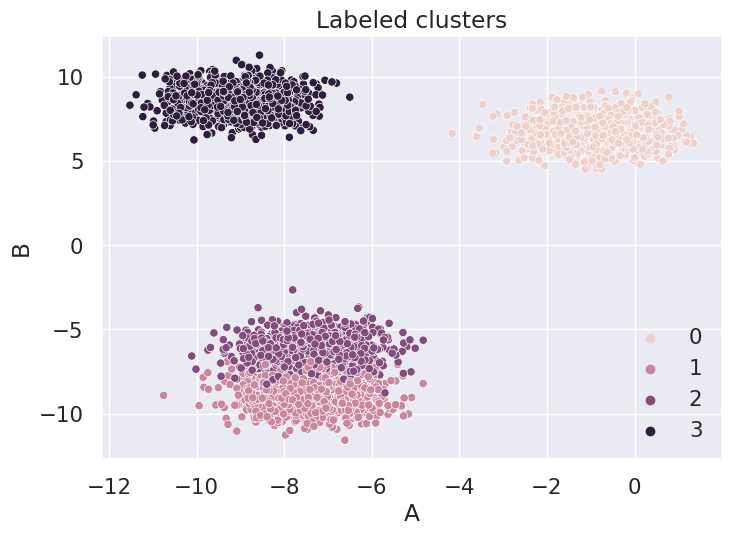

In [624]:
clustering_kmeans.gráfico_scatterplot(
    dataframe=df,
    x='A',
    y='B',
    hue=y
)

In [625]:
centroids, labels, intertia = clustering_kmeans.clustering_k_means(
    x=x,
    n_clusters=4
)

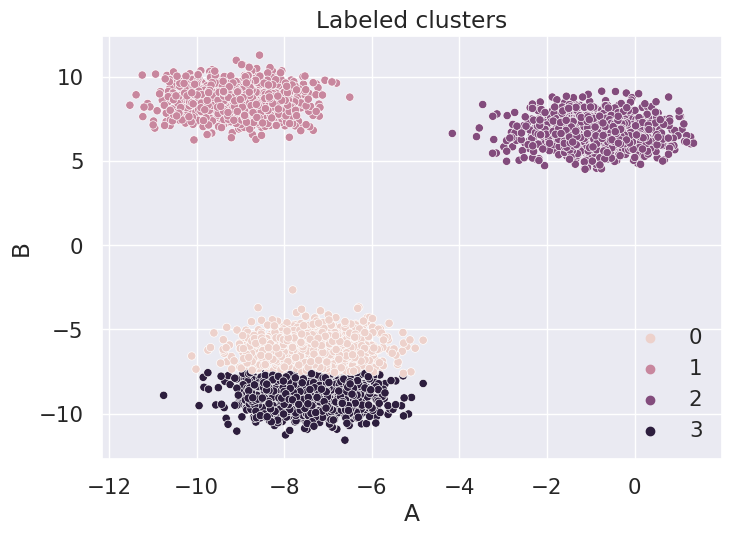

In [626]:
clustering_kmeans.gráfico_scatterplot(
    dataframe=df,
    x='A',
    y='B',
    hue=labels
)

## Distinct APIs for K-means

No sklearn, podemos utilizar algoritmos de clusterização através classes ou funções (vide [este link](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.cluster)).

In [627]:
centroids, labels, intertia = clustering_kmeans.clustering_k_means_pipeline(
    x=x,
    n_clusters=4
)

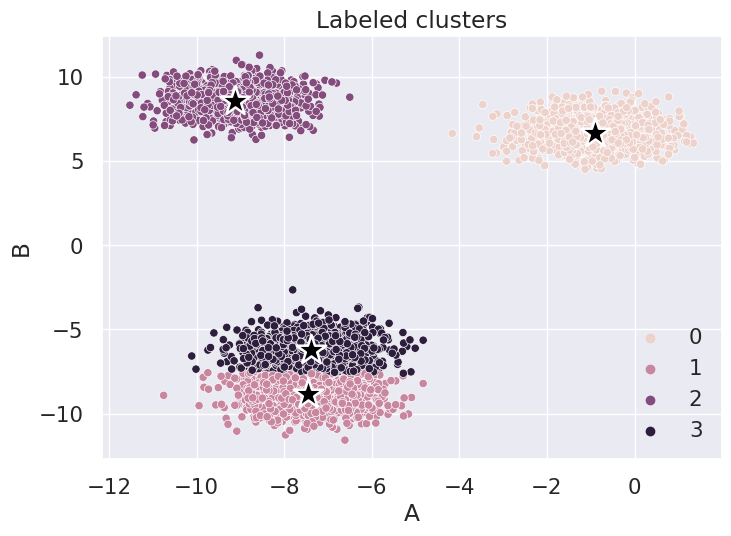

In [628]:
clustering_kmeans.gráfico_de_visualize_simulated_clusters_scatterplot(
    dataframe=df,
    x='A',
    y='B',
    hue=labels,
    centroids=centroids
)

## Model evaluation:

Uma boa clusterização vai produzir:
- Alta similaridade intra-cluster
- Pouca similaridade entre clusters
- 
Métricas:
- WCSS
- Silhouette
- Davies Bouldin (`intracluster / intercluster`)
- Calinski Harabasz (`soma_intercluster / soma_intracluster`)

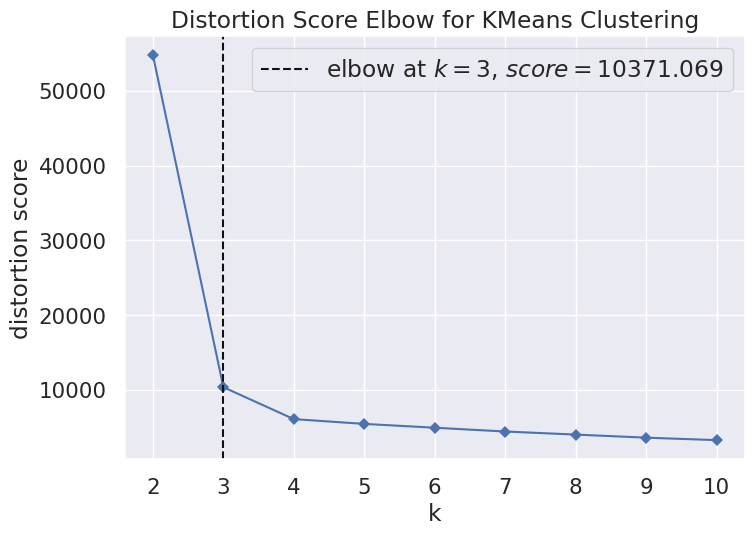

KElbowVisualizer(ax=<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>,
                 estimator=KMeans(n_clusters=10), timings=False)

In [629]:
clustering_kmeans.gráfico_kelbow_visualizer(
    modelo=KMeans(), 
    x=x, 
    k=10,
)

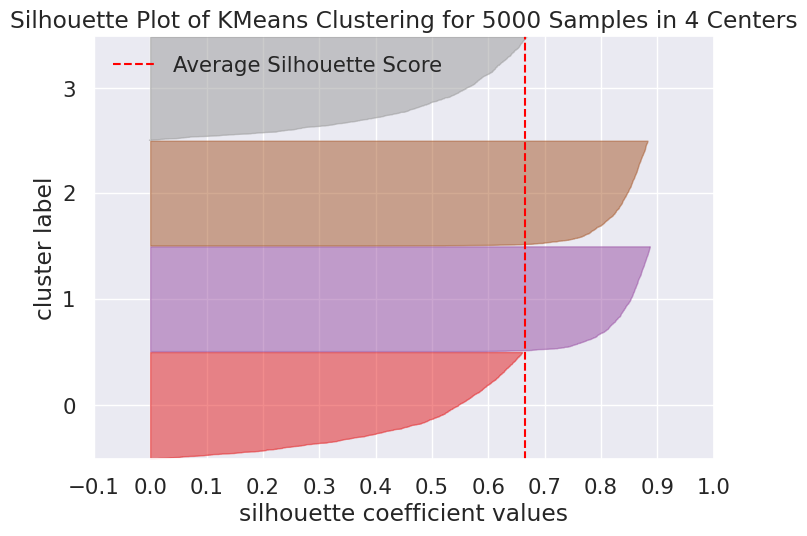

SilhouetteVisualizer(ax=<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 5000 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>,
                     estimator=KMeans(n_clusters=4))

In [630]:
clustering_kmeans.gráfico_silhouette_visualizer(
    modelo=KMeans(n_clusters=4),
    x=x
)

Testando distintos agrupamentos:

In [631]:
cluster_metrics = silhouette_score, davies_bouldin_score, calinski_harabasz_score

cluster_metrics_results, dataframe_result = clustering_kmeans.métricas_testando_distintos_agrupamentos_kmeans(
    n_clusters=(2, 11),
    x=x,
    cluster_metrics=cluster_metrics,
)
    
display(dataframe_result)

,inertia,silhouette_score,davies_bouldin_score,calinski_harabasz_score
n_clusters,,,,
2,54791.065466,0.778021,0.379666,26947.103959
3,10371.068985,0.848835,0.210501,81868.698963
4,6101.917544,0.664860,0.489890,93912.200119
5,5469.964606,0.590890,0.722630,78714.519126
6,4933.833547,0.458006,0.968577,69927.606341
7,4450.402547,0.328260,1.155292,64663.314145
8,4035.899463,0.319418,1.126240,61213.000279
9,3617.115506,0.321274,1.093900,59801.582393
10,3304.527202,0.321905,1.027832,58222.421122


# Clusterização Hierarquica:

**Tipos:**
- Agglomerative (bottom-up)
- Dissimilarity (top-down)

**Vantagens:**
- Fácil interpretação
- Não é necessário estabelecer a quantidade de grupos previamente

**Desvantagens:**
- Não escala bem com muitos dados
- Dendograma fica com visualização inviável para muitas amostras

## DataFrame:

In [632]:
# Simulate clusters
x, y = datasets.make_blobs(n_samples=80, n_features=2, centers=4, cluster_std=.6, random_state=0)
df = pd.DataFrame(x, columns=list(string.ascii_uppercase[:x.shape[1]]))

In [633]:
display(df.head())

,A,B
0,-1.710205,8.159010
1,-0.397014,2.109227
2,-1.148252,8.216479
3,2.334665,-0.024083
4,-1.347961,3.713714


## Código:

In [634]:
class HierarchicalClustering(DataVisualization):
    def hierarchical_clustering_with_scipy(self, dataframe: pd.DataFrame):
        Z = linkage(dataframe, method='ward')
        dendrogram_dict = dendrogram(Z, color_threshold=10)
        plt.show()


if __name__ == '__main__':
    hierarchical_clustering = HierarchicalClustering()

## Output:

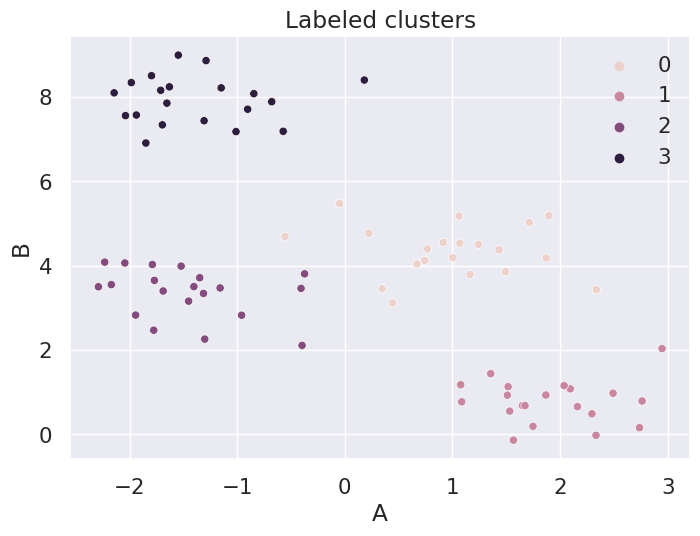

In [635]:
hierarchical_clustering.gráfico_scatterplot(
    dataframe=df,
    x='A',
    y='B',
    hue=y,
    titulo='clustering',
)

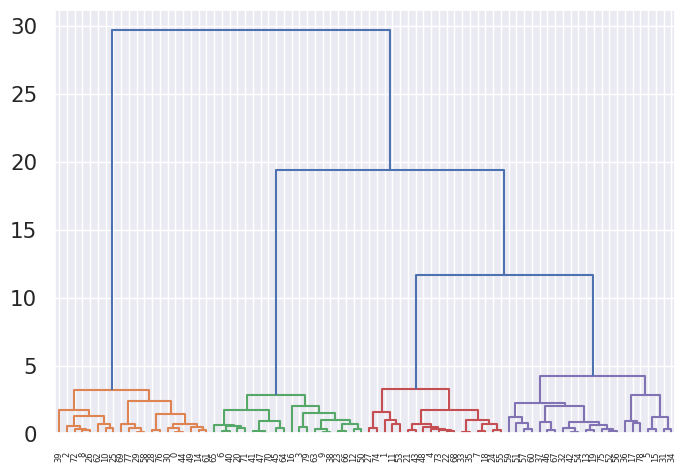

In [636]:
hierarchical_clustering.hierarchical_clustering_with_scipy(
    dataframe=df
)

# DBSCAN:

**Vantagens:**
- Não necessita especificar a quantidade de clusters
- Detecta clusters de formatos variados (densos)
- Robusto aos outliers

**Desvantagens:**
- A qualidade do cluster depende muito métrica de distância
- Não funciona bem em clusters com densidades diferentes (OPTICS)

## DataFrame:

In [637]:
# Simulate clusters
x, y = datasets.make_blobs(n_samples=int(5E3), n_features=2, centers=4, cluster_std=.8, random_state=0)
df = pd.DataFrame(x, columns=list(string.ascii_uppercase[:x.shape[1]]))

In [638]:
display(df.head())

,A,B
0,1.998996,1.535900
1,-2.788784,2.773154
2,-0.956255,3.630438
3,2.777738,-1.508286
4,0.982364,5.013279


## Código:

In [639]:
class ClusteringDBSCAN(DataVisualization):
    def clustering_dbscan_pipeline(self, x):
        model = DBSCAN()
        labels = model.fit_predict(x)

        return labels

if __name__ == '__main__':
    clustering_dbscan = ClusteringDBSCAN()

## Output:

In [640]:
labels = clustering_dbscan.clustering_dbscan_pipeline(
    x=x
)

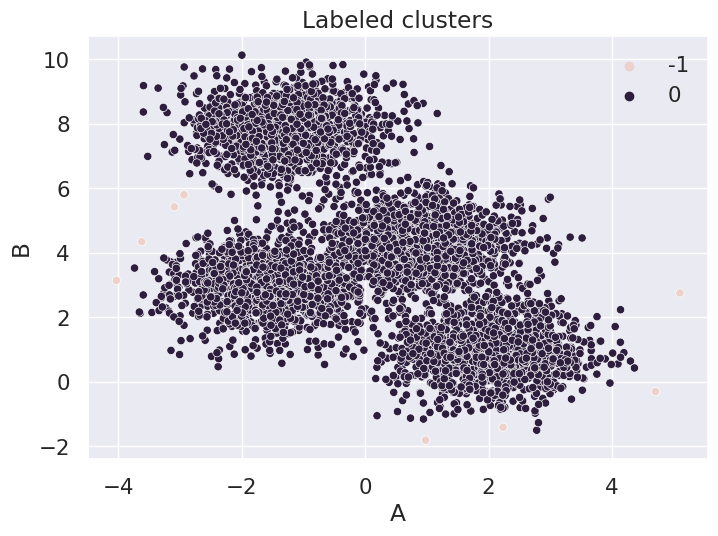

In [641]:
clustering_dbscan.gráfico_scatterplot(
    dataframe=df,
    x='A',
    y='B',
    hue=labels,
    titulo='clustering_dbscan'
)

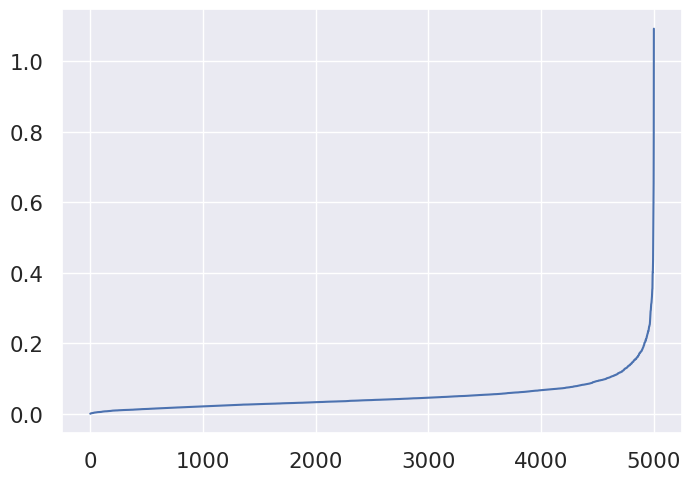

In [642]:
# https://towardsdatascience.com/machine-learning-clustering-dbscan-determine-the-optimal-value-for-epsilon-eps-python-example-3100091cfbc
from sklearn.neighbors import NearestNeighbors
nn_model = NearestNeighbors(n_neighbors=2).fit(x)
distances, indices = nn_model.kneighbors(x)
distances = np.sort(distances, axis=0)
plt.plot(distances[:,1])
plt.show()

# MeanShift:

**Vantagens:**
- Possui apenas um parâmetro principal (bandwidth)
- Não necessita especificar a quantidade de clusters

**Desvantagens:**
- Computacionalmente custoso com grande volume de dados
- Não é possível especificar número de clusters

# DataFrame:

In [643]:
# Simulate clusters
# Simulate clusters
x, y = datasets.make_blobs(n_samples=int(1E3), n_features=2, centers=4, cluster_std=.8, random_state=0)
df = pd.DataFrame(x, columns=list(string.ascii_uppercase[:x.shape[1]]))

In [644]:
display(df.head())

,A,B
0,-2.256086,7.858356
1,0.568548,3.953328
2,-2.602152,8.418937
3,-2.625338,2.063689
4,2.286564,1.227960


## Código:

In [645]:
class ClusteringMeanShift(DataVisualization):
    def clustering_mean_shift_pipeline(self, x, bandwidth: float):
        model = MeanShift(bandwidth=bandwidth)
        model.fit(x)

        centroids = model.cluster_centers_
        labels = model.labels_
        return centroids, labels
    
    def estimating_bandwidth(self, x):
        return estimate_bandwidth(x)

if __name__ == '__main__':
    clustering_mean_shift = ClusteringMeanShift()

## Output:

<AxesSubplot:xlabel='A', ylabel='B'>

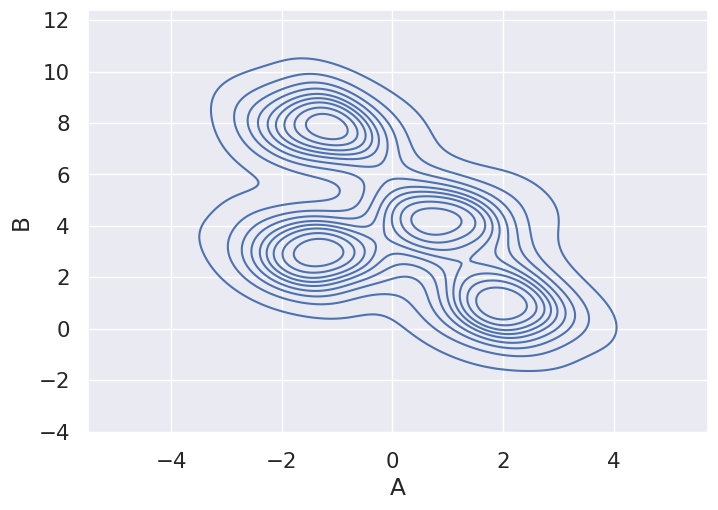

In [646]:
clustering_mean_shift.gráfico_density(
    dataframe=df, 
    x='A', 
    y='B'
)

In [647]:
bandwidth = clustering_mean_shift.estimating_bandwidth(
    x=x
)

In [648]:
centroids, labels = clustering_mean_shift.clustering_mean_shift_pipeline(
    x=x,
    bandwidth=bandwidth
)

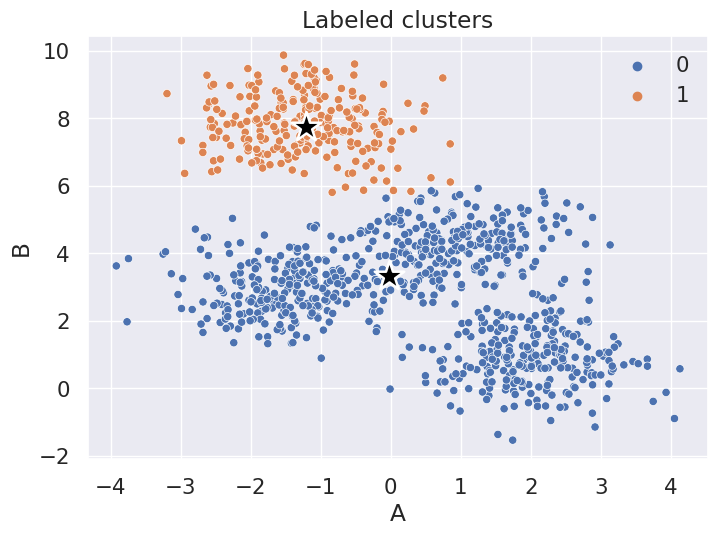

In [649]:
clustering_mean_shift.gráfico_de_visualize_simulated_clusters_scatterplot(
    dataframe=df,
    x='A',
    y='B',
    hue=labels,
    centroids=centroids
)

# Gaussian Mixture:

## DataFrame:

In [650]:
# Simulate clusters
x, y = datasets.make_blobs(n_samples=int(1E3), n_features=2, centers=4, cluster_std=.8, random_state=0)
df = pd.DataFrame(x, columns=list(string.ascii_uppercase[:x.shape[1]]))

In [651]:
display(df.head())

,A,B
0,-2.256086,7.858356
1,0.568548,3.953328
2,-2.602152,8.418937
3,-2.625338,2.063689
4,2.286564,1.227960


## Código:

In [652]:
class ClusteringGaussianMixture(DataVisualization):
    def clustering_gaussian_mixture_pipeline(self, x, n_components: int):
        model = GaussianMixture(n_components=n_components, covariance_type='spherical')
        model.fit(x)

        centroids = model.means_
        labels = model.predict(x)
        return model, labels, centroids
    
    def model_attributes(self, model):
        means = model.means_
        covariances = model.covariances_
        weights = model.weights_
        return means, covariances, weights
    
    def model_bic(self, model, x):
        bic = model.bic(x)
        return bic
    
    def predict_labels(self, model, x):
        predict = model.predict(x)[:5]
        return predict
    
    def predict_labels_probability(self, model, x):
        predict_proba = model.predict_proba(x)[:5]
        return predict_proba

    def mean_t(self, model):
        t = model.means_.T
        return 


if __name__ == '__main__':
    clustering_gaussian_mixture = ClusteringGaussianMixture()

## Output:

In [653]:
model, labels, centroids = clustering_gaussian_mixture.clustering_gaussian_mixture_pipeline(
    x=x,
    n_components=4
)

In [654]:
clustering_gaussian_mixture.model_attributes(
    model=model
)

(array([[-1.46742953,  2.91770509],
        [ 0.91559017,  4.2710942 ],
        [-1.28870348,  7.85166035],
        [ 1.99506403,  0.85900317]]),
 array([0.60524453, 0.6467691 , 0.61304804, 0.60535987]),
 array([0.24923426, 0.25115465, 0.24989313, 0.24971796]))

In [655]:
clustering_gaussian_mixture.model_bic(
    model=model, 
    x=x
)

7426.4725340594605

In [656]:
clustering_gaussian_mixture.predict_labels(
    model=model, 
    x=x
)

array([2, 1, 2, 0, 3])

In [657]:
clustering_gaussian_mixture.predict_labels_probability(
    model=model, 
    x=x
)

array([[2.26477374e-09, 4.09781975e-08, 9.99999957e-01, 1.90800124e-24],
       [1.66155677e-02, 9.83299260e-01, 3.04349256e-07, 8.48683486e-05],
       [2.56843817e-11, 5.92986506e-10, 9.99999999e-01, 4.44710101e-28],
       [9.99992521e-01, 7.44183976e-06, 1.73471302e-12, 3.67403383e-08],
       [9.95477687e-07, 2.05465177e-04, 1.01389106e-20, 9.99793539e-01]])

In [658]:
clustering_gaussian_mixture.mean_t(
    model=model
)

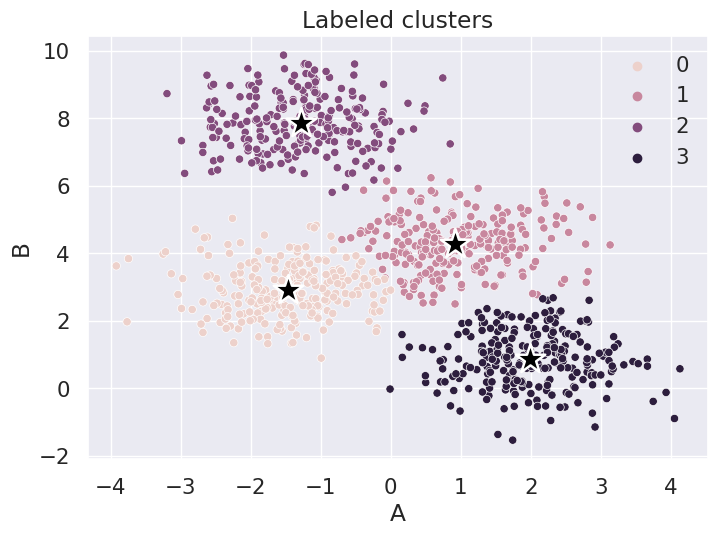

In [659]:
clustering_gaussian_mixture.gráfico_de_visualize_simulated_clusters_scatterplot(
    dataframe=df,
    x='A',
    y='B',
    hue=labels,
    centroids=centroids
)

In [660]:
# Select best model by covariance type and K (Practical Statistics for Data Scientists)
results = []
k_range = range(1,9)
covariance_types = ['full', 'tied', 'diag', 'spherical']

for n_components in k_range:
  for covariance_type in covariance_types:
    mclust = GaussianMixture(n_components=n_components, warm_start=True, covariance_type=covariance_type)
    mclust.fit(x)
    results.append({
      'bic': mclust.bic(x),
      'n_components': n_components,
      'covariance_type': covariance_type,
    })

results = pd.DataFrame(results)
results

,bic,n_components,covariance_type
0,8357.218909,1,full
1,8357.218909,1,tied
2,8679.299153,1,diag
3,8889.310673,1,spherical
4,7976.527656,2,full
5,8165.511057,2,tied
6,8050.082533,2,diag
7,8036.917677,2,spherical
8,7526.397339,3,full
9,7736.189981,3,tied


In [661]:
results.sort_values('bic').head()

,bic,n_components,covariance_type
13,7419.260030,4,tied
15,7426.425803,4,spherical
17,7442.842241,5,tied
14,7450.139988,4,diag
19,7457.969965,5,spherical


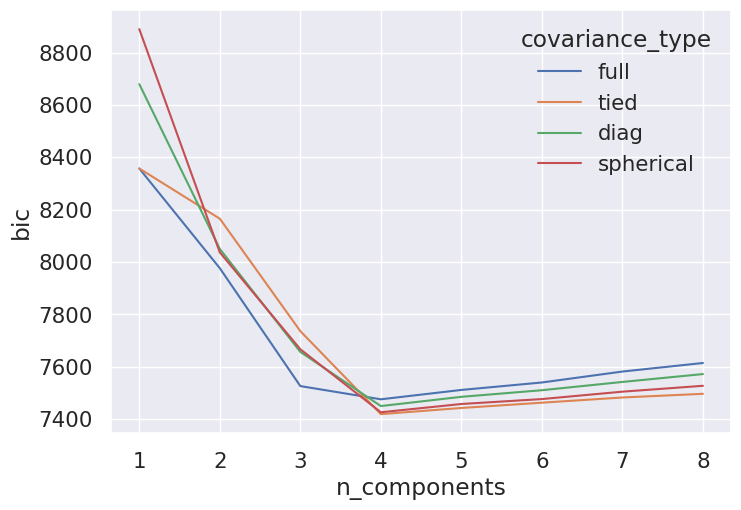

In [662]:
sns.lineplot(data=results, x='n_components', y='bic', hue='covariance_type');

# Dataset with mix data:

**Clustering com dados categóricos:**
- kmodes (apenas dados categóricos)
- kprototypes (dados numéricos e categóricos)
- hierarquical clustering com Glower' distance

**Análises de associação / redução de dimensionalidade:**
- Análise de correspondência simples (CA) - apenas dados categóricos com 2 variáveis
- Análise de correspondência múltipla (MCA) - apenas dados categóricos com 2 ou mais variáveis
- FAMD - dados mistos

## DataFrame:

Dados categóricos

In [663]:
# Load data
df = load_mushroom()[0]

In [664]:
display(df.head())

,shape,surface,color
0,convex,smooth,yellow
1,bell,smooth,white
2,convex,scaly,white
3,convex,smooth,gray
4,convex,scaly,yellow


## Código:

In [665]:
class ClusteringKModes(DataVisualization):
    def clustering_k_modes_pipeline(self, dataframe, n_clusters: int):
        model = KModes(n_clusters=n_clusters)
        model.fit(dataframe)
        labels = model.fit_predict(dataframe)
        cost = model.cost_

        return model, labels, cost
    
    def avaliando_modelo(self, dataframe):
        custos = [KModes(n_clusters=K).fit(dataframe).cost_ for K in range(2,11)]
        return custos


if __name__ == '__main__':
    clustering_k_modes = ClusteringKModes()

## Output:

In [666]:
model, labels, cost = clustering_k_modes.clustering_k_modes_pipeline(
    dataframe=df,
    n_clusters=4
)

In [667]:
custos = clustering_k_modes.avaliando_modelo(
    dataframe=df
)

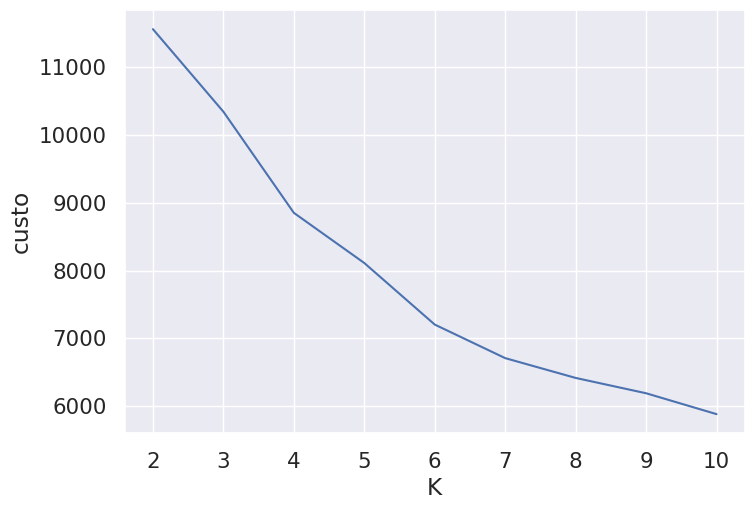

In [668]:
pd.Series(custos, index=range(2,11)).plot()
plt.xlabel('K')
plt.ylabel('custo')
plt.show()

# Dados mistos:

Fonte e dicionário do dataset: [https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset](https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset)

In [669]:
df_diabetes = pd.read_csv('https://raw.githubusercontent.com/Ekeany/Clustering-Mixed-Data/main/data/heart.csv')
df_diabetes = df_diabetes.drop(columns='target')

In [670]:
display(df_diabetes.head())

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [671]:
# Padroniza dados numéricos
numerical_columns = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
df_diabetes[numerical_columns] = df_diabetes[numerical_columns].apply(scale)

In [672]:
# Define posições dos dados categóricos
categorical_columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
categorical_idx = df_diabetes.columns.isin(categorical_columns).nonzero()[0].tolist()

In [673]:
# Modelagem com KPrototypes
model = KPrototypes()
model.fit(df_diabetes, categorical=categorical_idx)

KPrototypes(gamma=0.5)

In [674]:
model.predict(df_diabetes, categorical=categorical_idx)

array([7, 6, 5, 0, 2, 3, 2, 5, 3, 3, 1, 1, 1, 0, 3, 6, 2, 7, 1, 3, 0, 5,
       5, 3, 5, 3, 3, 6, 2, 6, 5, 0, 5, 1, 4, 6, 1, 3, 3, 2, 2, 1, 6, 1,
       1, 1, 5, 1, 4, 1, 1, 0, 4, 5, 3, 5, 5, 1, 5, 1, 0, 0, 5, 5, 3, 5,
       6, 1, 5, 0, 1, 0, 5, 1, 5, 1, 6, 3, 5, 0, 5, 1, 0, 3, 6, 2, 0, 5,
       6, 0, 5, 0, 5, 1, 6, 4, 2, 0, 1, 1, 1, 7, 3, 5, 5, 4, 3, 1, 1, 1,
       3, 3, 2, 5, 1, 5, 6, 6, 5, 1, 4, 1, 5, 1, 5, 5, 5, 3, 5, 4, 3, 1,
       1, 5, 1, 1, 4, 0, 4, 4, 1, 1, 5, 0, 4, 3, 5, 3, 5, 5, 7, 0, 3, 3,
       5, 0, 5, 5, 0, 1, 0, 2, 5, 5, 5, 4, 4, 7, 4, 7, 4, 5, 0, 7, 4, 6,
       0, 2, 6, 4, 2, 4, 2, 6, 7, 1, 4, 4, 1, 5, 2, 4, 4, 7, 7, 7, 7, 0,
       4, 0, 5, 4, 4, 3, 7, 1, 4, 7, 6, 3, 0, 7, 6, 2, 4, 2, 4, 4, 7, 1,
       2, 7, 2, 7, 4, 7, 4, 6, 3, 4, 5, 4, 3, 4, 4, 1, 1, 2, 0, 1, 7, 3,
       7, 4, 4, 1, 2, 3, 3, 7, 7, 1, 4, 4, 3, 1, 4, 4, 3, 6, 3, 0, 4, 0,
       4, 0, 7, 6, 4, 4, 1, 7, 4, 0, 4, 5, 4, 0, 2, 7, 4, 6, 4, 5, 4, 4,
       0, 3, 4, 4, 3, 7, 7, 3, 6, 7, 0, 4, 4, 6, 7,

In [675]:
# Avaliando modelo
model.cost_

1052.6752624445148

In [676]:
# Avaliando modelo
custos = [
    KPrototypes(K).fit(df_diabetes, categorical=categorical_idx).cost_
    for K in range(2,11)
    ]
custos

[1566.240390895024,
 1400.4792212337802,
 1295.6995617401003,
 1212.777646499924,
 1151.5384141074696,
 1099.1203921639546,
 1057.9252223383028,
 1024.4639271618114,
 979.873807111302]

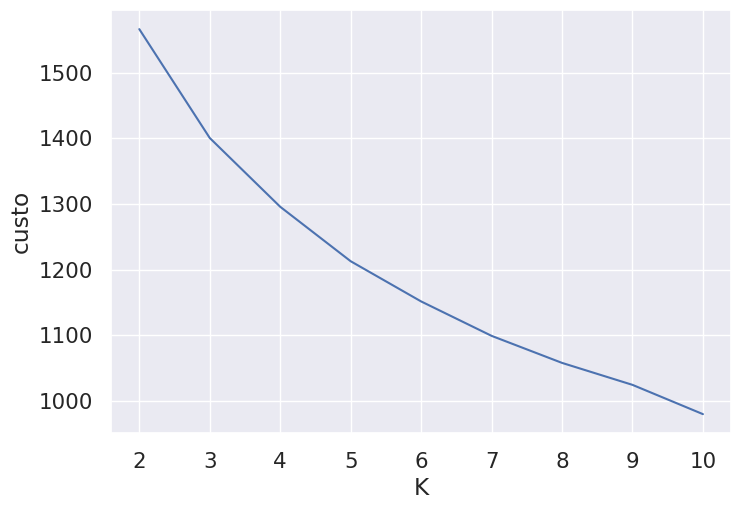

In [677]:
pd.Series(custos, index=range(2,11)).plot()
plt.xlabel('K')
plt.ylabel('custo')
plt.show()

# Case:

## DataFrame:

Wine dataset

In [678]:
df, _ = datasets.load_wine(as_frame=True, return_X_y=True)

In [679]:
display(df.head())

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


## Código:

In [680]:
class Case(DataVisualization):
    def clustering_k_means_pipeline(self, x, n_clusters: int):
        model = KMeans(n_clusters, random_state=0)
        model.fit(x)

        centroids = model.cluster_centers_
        labels = model.labels_
        inertia = model.inertia_
        return model, centroids, labels, inertia


if __name__ == '__main__':
    case = Case()

## Output:

### Data Understanding:

In [681]:
display(df.head(3))

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0


In [682]:
df.columns

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline'],
      dtype='object')

In [683]:
case.verificando_as_dimensões_do_dataframe(
    dataframe=df
)

Linhas: 178 
Colunas: 13


In [684]:
case.descrição(
    dataframe=df
)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00
mean,13.00,2.34,2.37,19.49,99.74,2.30,2.03,0.36,1.59,5.06,0.96,2.61,746.89
std,0.81,1.12,0.27,3.34,14.28,0.63,1.00,0.12,0.57,2.32,0.23,0.71,314.91
min,11.03,0.74,1.36,10.60,70.00,0.98,0.34,0.13,0.41,1.28,0.48,1.27,278.00
25%,12.36,1.60,2.21,17.20,88.00,1.74,1.20,0.27,1.25,3.22,0.78,1.94,500.50
50%,13.05,1.87,2.36,19.50,98.00,2.36,2.13,0.34,1.56,4.69,0.96,2.78,673.50
75%,13.68,3.08,2.56,21.50,107.00,2.80,2.88,0.44,1.95,6.20,1.12,3.17,985.00
max,14.83,5.80,3.23,30.00,162.00,3.88,5.08,0.66,3.58,13.00,1.71,4.00,1680.00


In [685]:
case.verificando_tipos(
    dataframe=df
)

,Tipos
alcohol,float64
malic_acid,float64
ash,float64
alcalinity_of_ash,float64
magnesium,float64
total_phenols,float64
flavanoids,float64
nonflavanoid_phenols,float64
proanthocyanins,float64
color_intensity,float64


In [686]:
case.verificando_valores_nulos(
    dataframe=df
)

,Quantidade,Porcentagem
alcohol,0,0.00%
malic_acid,0,0.00%
ash,0,0.00%
alcalinity_of_ash,0,0.00%
magnesium,0,0.00%
total_phenols,0,0.00%
flavanoids,0,0.00%
nonflavanoid_phenols,0,0.00%
proanthocyanins,0,0.00%
color_intensity,0,0.00%


In [687]:
case.verificando_valores_duplicados(
    dataframe=df
)

,Quantidade,Porcentagem
alcohol,52,29.21%
malic_acid,45,25.28%
ash,99,55.62%
alcalinity_of_ash,115,64.61%
magnesium,125,70.22%
total_phenols,81,45.51%
flavanoids,46,25.84%
nonflavanoid_phenols,139,78.09%
proanthocyanins,77,43.26%
color_intensity,46,25.84%


### Data Visualization:

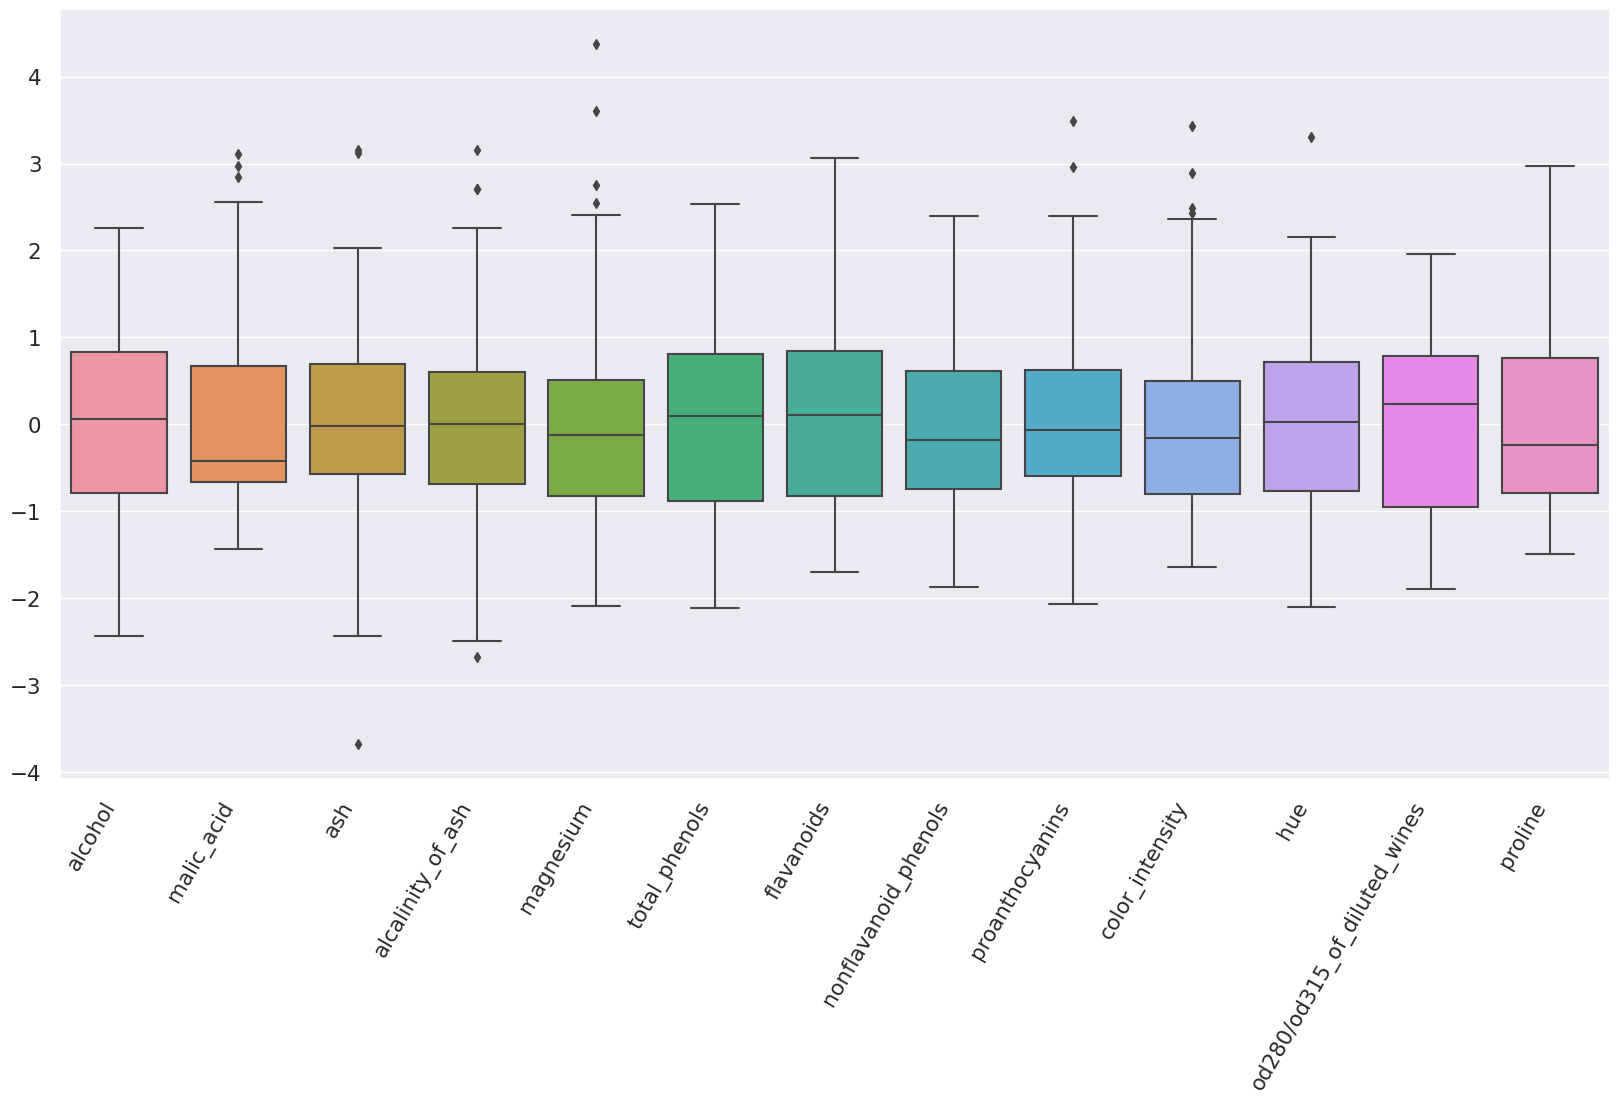

In [688]:
case.gráfico_outliers_boxplot(
    dataframe=df,
    figsize=(20, 10)
)

### Data Preparetion:

Normalizando os dados:

In [689]:
df = case.normalizando_os_dados(
    dataframe=df
)

Identificando e removendo linhas com outliers (|Z-score| > 3):

In [690]:
df, outlier_rows = case.removing_outliers_zscore(
    dataframe=df,
    zscore=3,
)

Amount of outliers: 10


### Data Visualization:

Verificando melhor K

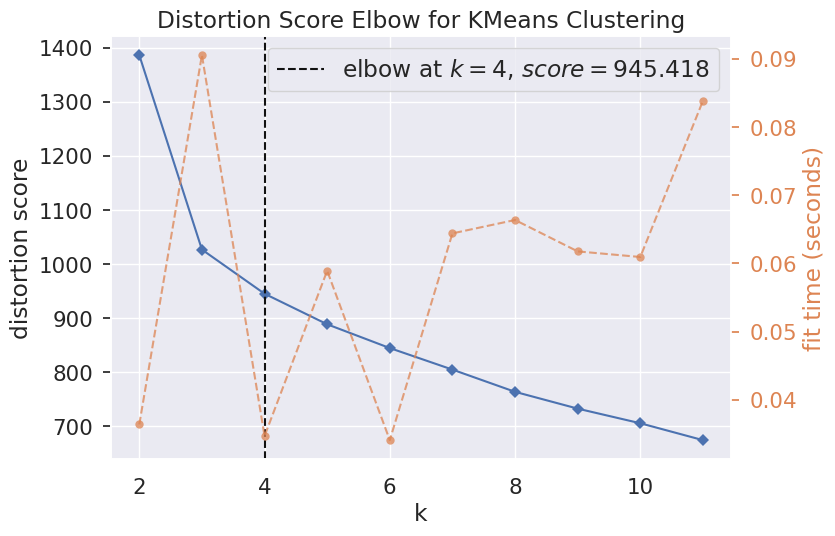

In [691]:
kelbow_visualizer(
    model=KMeans(), 
    X=df, 
    k=11
);

## Clusterizando:

Criando e treinando modelo

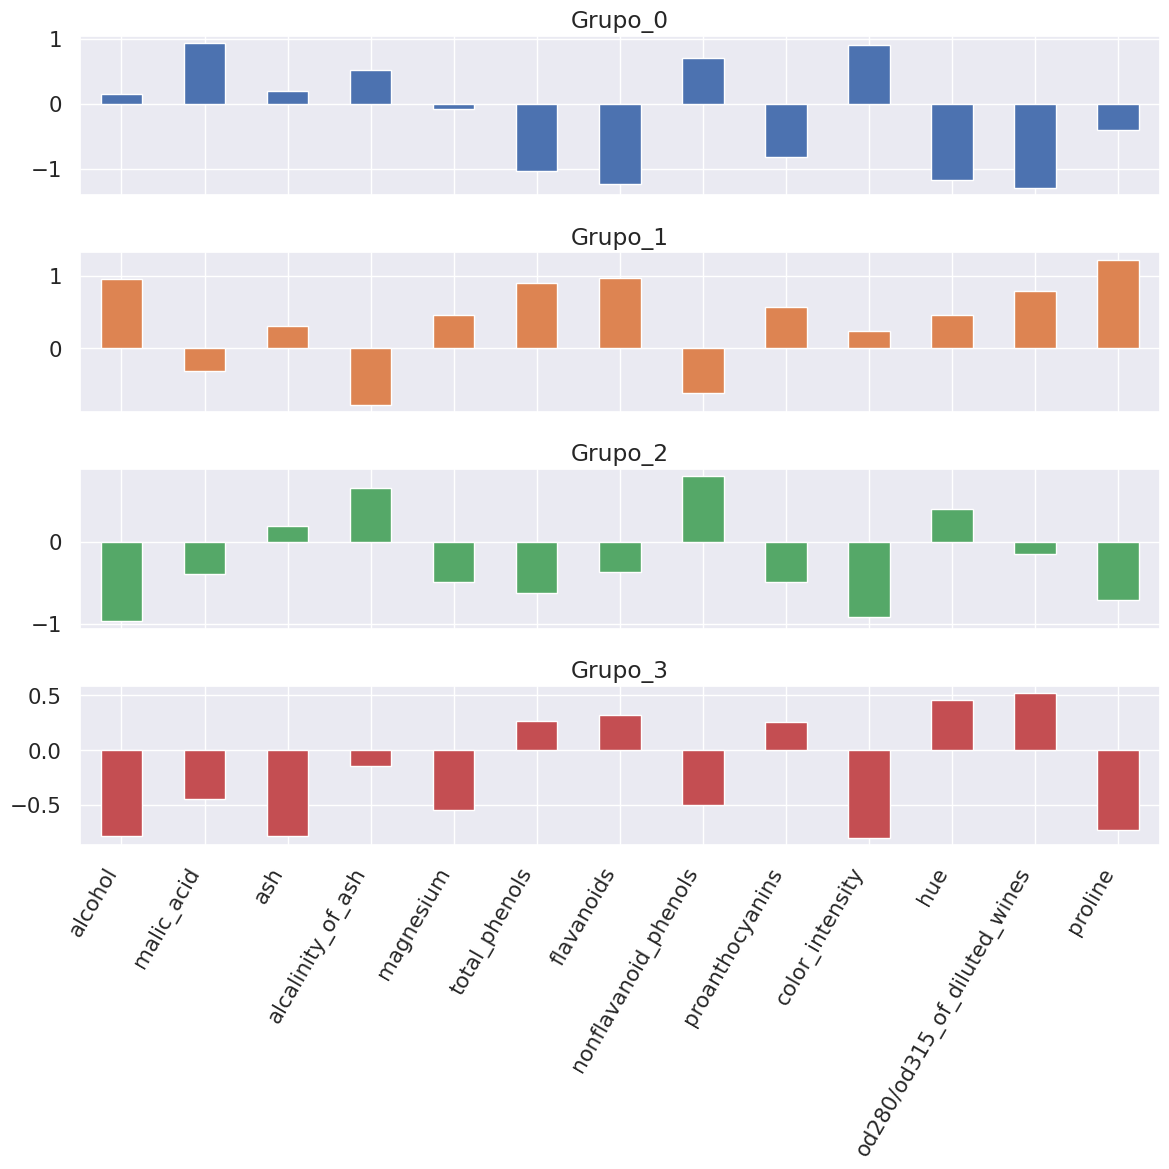

In [693]:
(
  pd.DataFrame(centroids, columns=df.columns)
  .T.add_prefix('Grupo_')
  .plot.bar(subplots=True, figsize=(12,12), legend=False)
)

plt.xticks(rotation=60, ha='right')
plt.tight_layout()
plt.show()

In [694]:
centers = pd.DataFrame(centroids, columns=df.columns)
display(centers)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,0.146964,0.937031,0.195499,0.528549,-0.076428,-1.026817,-1.237424,0.700397,-0.816473,0.903750,-1.179659,-1.296928,-0.398762
1,0.960537,-0.316354,0.309729,-0.774933,0.455725,0.897698,0.974760,-0.607763,0.563785,0.241598,0.463243,0.786065,1.220968
2,-0.974152,-0.395284,0.191113,0.648933,-0.490200,-0.628614,-0.367120,0.797288,-0.495663,-0.916222,0.401839,-0.154359,-0.709675
3,-0.786132,-0.453349,-0.790481,-0.143883,-0.549105,0.265048,0.316454,-0.502648,0.255705,-0.806486,0.453388,0.521338,-0.734021


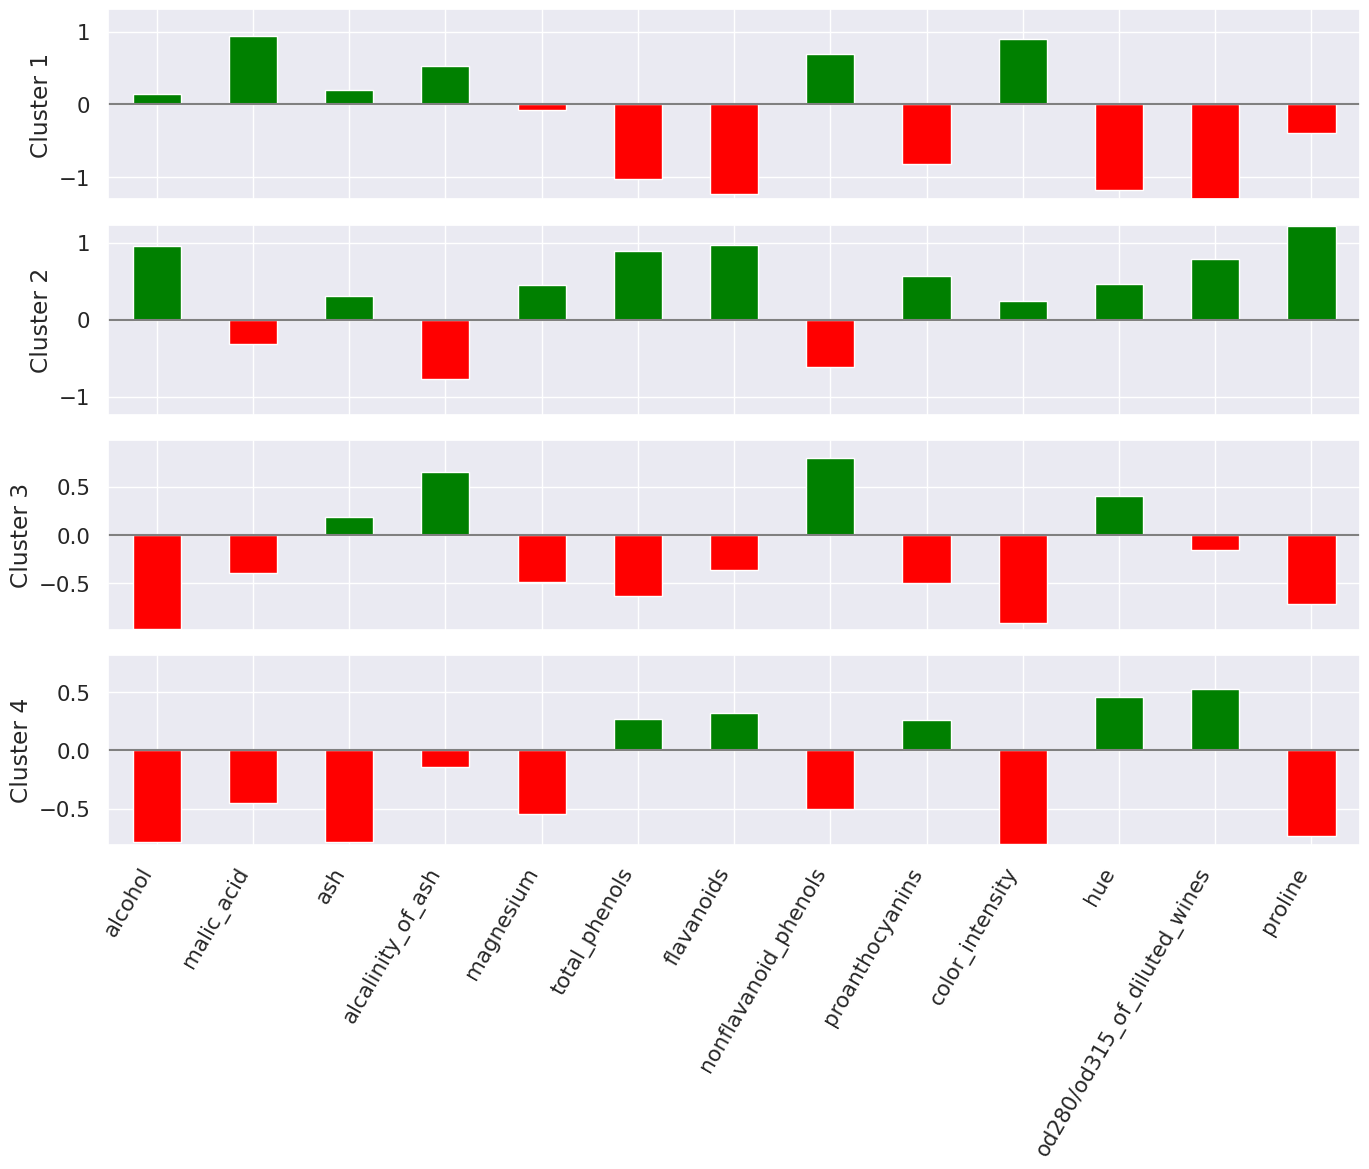

In [695]:
# Adaptado do livro "Practical Statistics for Data Scientists"
fig,axes = plt.subplots(nrows=4, figsize=(14,12), sharex=True)

for i,ax in enumerate(axes):
  center = centers.loc[i,:]
  maxPC = 1.01 * center.abs().max()
  colors = ['green' if l > 0 else 'red' for l in center]
  center.plot.bar(ax=ax, color=colors)
  ax.set_ylabel(f'Cluster {i+1}')
  ax.set_ylim(-maxPC, maxPC)
  ax.axhline(color='gray')
  ax.xaxis.set_ticks_position('none') 

plt.xticks(rotation=60, ha='right')
plt.tight_layout()
plt.show()

In [696]:
(
  df[~outlier_rows].assign(cluster=labels)
  .groupby('cluster')
  .agg(['mean','min','median','max'])
)

/tmp/ipykernel_14903/2040777054.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[~outlier_rows].assign(cluster=labels)


alcohol                               malic_acid            \
             mean       min    median       max       mean       min   
cluster                                                                
0        0.146964 -0.988975  0.135116  1.432144   0.937031 -0.984151   
1        0.960537 -0.186053  0.944214  2.259772  -0.316354 -0.885409   
2       -0.974152 -1.964835 -1.137207  0.604516  -0.395284 -1.432983   
3       -0.786132 -1.915424 -0.822215  1.061565  -0.453349 -1.298334   

                                  ash            ...       hue            \
           median       max      mean       min  ...    median       max   
cluster                                          ...                       
0        0.865035  2.974543  0.195499 -1.412851  ... -1.261138  0.011190   
1       -0.512878  1.529305  0.309729 -1.193530  ...  0.471861  1.415139   
2       -0.634063  1.879394  0.191113 -1.266637  ...  0.098937  2.160986   
3       -0.732806  1.771674 -0.790481 -2.436346  ...  0.449924  2.029366   

        od280/od315_of_diluted_wines                                 proline  \
                                mean       min    median       max      mean   
cluster                                                                        
0                          -1.296928 -1.895054 -1.315952 -0.200123 -0.398762   
1                           0.786065 -0.143625  0.788587  1.960915  1.220968   
2                          -0.154359 -1.443072 -0.157749  0.972205 -0.709675   
3                           0.521338 -0.666229  0.597908  1.452436 -0.734021   

                                       
              min    median       max  
cluster                                
0       -1.193845 -0.404091  0.423878  
1       -0.037874  1.124466  2.971473  
2       -1.375361 -0.802153  0.392033  
3       -1.493188 -0.853104  0.869707  

[4 rows x 52 columns]

In [697]:
(
  df[~outlier_rows].assign(cluster=labels)
  .groupby('cluster')
  .mean()
  .transpose()
  .style.background_gradient(cmap='YlOrRd', axis=1)
)

/tmp/ipykernel_14903/703220561.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[~outlier_rows].assign(cluster=labels)


cluster,0,1,2,3
alcohol,0.146964,0.960537,-0.974152,-0.786132
malic_acid,0.937031,-0.316354,-0.395284,-0.453349
ash,0.195499,0.309729,0.191113,-0.790481
alcalinity_of_ash,0.528549,-0.774933,0.648933,-0.143883
magnesium,-0.076428,0.455725,-0.490200,-0.549105
total_phenols,-1.026817,0.897698,-0.628614,0.265048
flavanoids,-1.237424,0.974760,-0.367120,0.316454
nonflavanoid_phenols,0.700397,-0.607763,0.797288,-0.502648
proanthocyanins,-0.816473,0.563785,-0.495663,0.255705
color_intensity,0.903750,0.241598,-0.916222,-0.806486


In [698]:
silhouette_score(df[~outlier_rows], labels)

/tmp/ipykernel_14903/1446218982.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  silhouette_score(df[~outlier_rows], labels)


0.24989859662052233